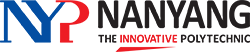

# Practical 6b: Sentiment Classification


## Objectives

- Construct document sentiment classification models and evaluate using appropriate performance metrics.

## Sentiment Classification using Python
This exercise shows how you can perform sentiment analysis on movie reviews using Python and Natural Language Toolkit (NLTK).

Sentiment Analysis means analyzing the sentiment of a given text or document and categorizing the text/document into a specific class or category (like positive and negative). In other words, we can say that sentiment analysis classifies any particular text or document as positive or negative. Basically, the classification is done for two classes: positive and negative. However, we can add more classes like neutral, highly positive, highly negative, etc.

Sentiment Analysis is also referred as Opinion Mining. It’s mostly used in social media and customer reviews data.

In this exercise, we will learn about labeling data, extracting features, training classifier, and testing the accuracy of the classifier.



## Import libraries and download the packages

```Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')
```
*NOTE: You have to use nltk.download() after installing it to get additional dependencies.*

In [14]:
# pip install matplotlib

In [15]:
# pip install nltk

In [16]:
!pip install numpy==1.26.4

In [17]:
# Enter code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/wong/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/wong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Supervised Classification

Here, we will be doing supervised text classification. In supervised classification, the classifier is trained with **labeled training data**.

In this exercise, we will use the NLTK’s **movie_reviews** corpus as our labeled training data. The **movie_reviews** corpus contains 2K movie reviews with sentiment polarity classification. It’s compiled by Pang, Lee.

Here, we have two categories for classification. They are: positive and negative. The movie_reviews corpus already has the reviews categorized as positive and negative.

## Create list of movie review document
This list contains array containing tuples of all movie review words and their respective category (pos or neg).

```Python
# Load the movie review dataset
from nltk.corpus import movie_reviews 

reviews = []
for fileid in movie_reviews.fileids():
    sentiment, filename = fileid.split('/')
    reviews.append((filename, movie_reviews.raw(fileid), sentiment))

df = pd.DataFrame(reviews, columns=['filename', 'text', 'sentiment'])
print(df.shape)
display(df.head())

# Plotting the Sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()
```

(2000, 3)


,filename,text,sentiment
0,cv000_29416.txt,"plot : two teen couples go to a church party ,...",neg
1,cv001_19502.txt,the happy bastard's quick movie review \ndamn ...,neg
2,cv002_17424.txt,it is movies like these that make a jaded movi...,neg
3,cv003_12683.txt,""" quest for camelot "" is warner bros . ' firs...",neg
4,cv004_12641.txt,synopsis : a mentally unstable man undergoing ...,neg


/var/folders/53/1_08_22s37n3r4dm51m_8m7c0000gn/T/ipykernel_16050/408907424.py:15: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['sentiment']).plot.bar(title="Sentiment Distribution")


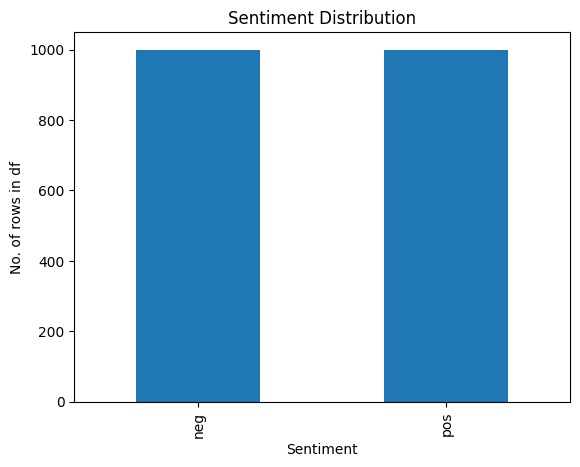

In [18]:
# Enter code here
from nltk.corpus import movie_reviews 

reviews = []
for fileid in movie_reviews.fileids():
    sentiment, filename = fileid.split('/')
    reviews.append((filename, movie_reviews.raw(fileid), sentiment))

df = pd.DataFrame(reviews, columns=['filename', 'text', 'sentiment'])
print(df.shape)
display(df.head())

# Plotting the Sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

## Feature Extraction
To classify the text into any category, we need to define some criteria. On the basis of those criteria, our classifier will learn that a particular kind of text falls in a particular category. This kind of criteria is known as **feature**. We can define one or more feature to train our classifier.

In this example, we will use the **top-N words feature**.

### Fetch all words from the movie reviews corpus

We first fetch all the words from all the movie reviews and create a list.

```Python
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

all_words = [word.lower() for sent in df.text for word in word_tokenize(sent)]
    
# print first 10 words
print (all_words[:10])
```

In [19]:
# Enter codes here
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

all_words = [word.lower() for sent in df.text for word in word_tokenize(sent)]
    
# print first 10 words
print (all_words[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


### Create Frequency Distribution of all words
Frequency Distribution will calculate the number of occurence of each word in the entire list of words.

```Python
from nltk import FreqDist
 
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))
```

In [20]:
# Enter codes here
from nltk import FreqDist
 
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

<FreqDist with 46462 samples and 1525022 outcomes>
[(',', 77717), ('the', 76276), ('.', 65876), ('a', 37995), ('and', 35404), ('of', 33972), ('to', 31772), ('is', 26054), ('in', 21611), ("'s", 18128)]


### Removing Punctuation and Stopwords

From the above frequency distribution of words, we can see the most frequently occurring words are either punctuation marks or stopwords.

Stop words are those frequently words which do not carry any significant meaning in text analysis. For example, I, me, my, the, a, and, is, are, he, she, we, etc.

Punctuation marks like comma, fullstop. inverted comma, etc. occur highly in any text data.

We will do **data cleaning** by removing stop words and punctuations.

```Python
import string
from nltk.corpus import stopwords
from gensim.parsing.porter import PorterStemmer

porter_stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

def clean(doc):
    all_words_clean = []
    for word in doc:
        if word not in stopwords_english and not word.isdigit():
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if len(punc_free)>2 and not word.isdigit():
                all_words_clean.append(porter_stemmer.stem(punc_free))

    return all_words_clean

all_words_clean = clean(all_words)

# print the first 10 words
print (all_words_clean[:10])
```


In [21]:
# pip install gensim

In [22]:
# Enter code here
import string
from nltk.corpus import stopwords
from gensim.parsing.porter import PorterStemmer

porter_stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

def clean(doc):
    all_words_clean = []
    for word in doc:
        if word not in stopwords_english and not word.isdigit():
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if len(punc_free)>2 and not word.isdigit():
                all_words_clean.append(porter_stemmer.stem(punc_free))

    return all_words_clean

all_words_clean = clean(all_words)

# print the first 10 words
print (all_words_clean[:10])

['plot', 'two', 'teen', 'coupl', 'church', 'parti', 'drink', 'drive', 'get', 'accid']


### Frequency Distribution of cleaned words list

Below is the frequency distribution of the new list after removing stopwords and punctuation.

```Python
all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))
```

In [23]:
# Enter code here
all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

<FreqDist with 30899 samples and 686216 outcomes>
[('film', 11118), ('movi', 6867), ('on', 5766), ('like', 3999), ('charact', 3860), ('get', 3192), ('make', 3155), ('time', 2902), ('scene', 2642), ('even', 2603)]


Previously, before removing stopwords and punctuation, the frequency distribution was:

> **FreqDist with 46462 samples and 1525039 outcomes**

Now, the frequency distribution is:

> **FreqDist with 30899 samples and 686219 outcomes**

This shows that after removing around 10000 stop words, numbers and punctuation, the outcomes/words number has reduced to around half of the original size.

The **most common words** or highly occurring words list has also got meaningful words in the list. Before, the first 10 frequently occurring words were only stop-words and punctuations.

### Create Word Feature using 2000 most frequently occurring words

We take 2000 most frequently occurring words as our feature.
```Python
print (len(all_words_frequency)) 
 
# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)

# print the first 10 most frequently occuring words
print (most_common_words[:10])

# print the last 10 most frequently occuring words
print (most_common_words[1990:])

# the most common words list's elements are in the form of tuple get 
# only the first element of each tuple of the word list
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

```

In [24]:
# Enter code here
print (len(all_words_frequency)) 
 
# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)

# print the first 10 most frequently occuring words
print (most_common_words[:10])

# print the last 10 most frequently occuring words
print (most_common_words[1990:])

# the most common words list's elements are in the form of tuple get 
# only the first element of each tuple of the word list
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

30899
[('film', 11118), ('movi', 6867), ('on', 5766), ('like', 3999), ('charact', 3860), ('get', 3192), ('make', 3155), ('time', 2902), ('scene', 2642), ('even', 2603)]
[('todd', 59), ('nevertheless', 59), ('skip', 58), ('fatal', 58), ('wealthi', 58), ('switch', 58), ('oddli', 58), ('offici', 58), ('weekend', 58), ('pie', 58)]
['film', 'movi', 'on', 'like', 'charact', 'get', 'make', 'time', 'scene', 'even']


### Create Feature Set
First, we will preform text preprocessing and loop through the reviews to preprocess the reviews.

```Python
df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))
df['text'] = df['text'].apply(lambda x: clean(x))  
df.head()
```

In [25]:
# Enter code here
df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))
df['text'] = df['text'].apply(lambda x: clean(x))  
df.head()

,filename,text,sentiment
0,cv000_29416.txt,"[plot, two, teen, coupl, church, parti, drink,...",neg
1,cv001_19502.txt,"[happi, bastard, quick, movi, review, damn, y2...",neg
2,cv002_17424.txt,"[movi, like, make, jade, movi, viewer, thank, ...",neg
3,cv003_12683.txt,"[quest, camelot, warner, bro, first, featurele...",neg
4,cv004_12641.txt,"[synopsi, mental, unstabl, man, undergo, psych...",neg


Now, we write a function that will be used to create feature set. The feature set is used to train the classifier.

We define a feature extractor function that checks if the words in a given document are present in the word_features list or not.
```Python
def document_features(df, stemmed_tokens):
    doc_features = []
    for index, row in df.iterrows():
        features = {}
        for word in word_features:
            # get term occurence: true if it's in the word_features, false if it's not
            features[word] = (word in row[stemmed_tokens])
        doc_features.append(features)
    return doc_features

feature_set = pd.DataFrame(document_features(df, 'text'), index = df.index)
feature_set.head()
```

In [26]:
# Enter code here
def document_features(df, stemmed_tokens):
    doc_features = []
    for index, row in df.iterrows():
        features = {}
        for word in word_features:
            # get term occurence: true if it's in the word_features, false if it's not
            features[word] = (word in row[stemmed_tokens])
        doc_features.append(features)
    return doc_features

feature_set = pd.DataFrame(document_features(df, 'text'), index = df.index)
feature_set.head()

,film,movi,on,like,charact,get,make,time,scene,even,...,todd,nevertheless,skip,fatal,wealthi,switch,oddli,offici,weekend,pie
0,True,True,True,True,True,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False
1,False,True,False,True,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,False


## Training Classifier

From the feature set we created above, we now create a separate training set and a separate testing/validation set. The train set is used to train the classifier and the test set is used to test the classifier to check how accurately it classifies the given text.

### Creating Train and Test Dataset

In this example, we use the first 400 elements of the feature set array as a test set and the rest of the data as a train set. Generally, 80/20 percent is a fair split between training and testing set, i.e. 80 percent training set and 20 percent testing set.
```Python
import seaborn as sns
from sklearn.model_selection import train_test_split

X = feature_set
y = df[df.columns[-1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print (y_train.sentiment.value_counts(normalize=True))

#plot chart
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
sns.countplot(data=y_train, x='sentiment')
```

In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!

In [33]:
import seaborn as sns
from sklearn.model_selection import train_test_split

X = feature_set
y = df[df.columns[-1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print (y_train.sentiment.value_counts(normalize=True))

#plot chart
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
sns.countplot(data=y_train, x='sentiment')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Training a Classifier

Now, we train a classifier using the training dataset. There are different kind of classifiers namely Naive Bayes Classifier, Maximum Entropy Classifier, Decision Tree Classifier, Support Vector Machine Classifier, etc.

In this example, we use the **Decision Tree Classifier**. 

```Python
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test)))

# accuracy score
y_pred = classifier.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
```

In [30]:
# Enter codes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test)))

# accuracy score
y_pred = classifier.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/tmsa/lib/python3.11/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/tmsa/lib/python3.11/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/tmsa/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/tmsa/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

Print the confusion matrix to look at the prediction for test data

```Python
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Ploting the confusion matrix
conf_matrix(y_test, y_pred)
```

In [ ]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Ploting the confusion matrix
conf_matrix(y_test, y_pred)


Let’s see the output of the classifier by providing some custom reviews.

```Python
# Negative review correctly classified as negative 
# Positive review is classified as negative
data = {'custom_review': ['I hated the film. It was a disaster. Poor direction, bad acting.', 
                          'It was a wonderful and amazing movie. I loved it. Best direction, good acting.']}

df_test = pd.DataFrame (data, columns = ['custom_review'])
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: word_tokenize(x.lower()))
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: clean(x))

test_features = pd.DataFrame(document_features(df_test, 'custom_review'), index = df_test.index)
print (classifier.predict(test_features))
```

In [ ]:
# Enter codes here
data = {'custom_review': ['I hated the film. It was a disaster. Poor direction, bad acting.', 
                          'It was a wonderful and amazing movie. I loved it. Best direction, good acting.']}

df_test = pd.DataFrame (data, columns = ['custom_review'])
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: word_tokenize(x.lower()))
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: clean(x))

test_features = pd.DataFrame(document_features(df_test, 'custom_review'), index = df_test.index)
print (classifier.predict(test_features))

In the above example, we used top-N words feature. We used 2000 most frequently occurring words as our top-N words feature. The classifier identified negative review as negative. However, the classifier was not able to classify positive review correctly. It classified a positive review as negative. We need to improve our feature set for more accurate prediction.

## Bag of Words using TF-IDF Feature
Next, we will create the feature set using TF-IDF. We will create a dictionary of unique words and calculate the term weights for the text feature. Below is the function to create Term Frequency features.

```Python
import gensim
from gensim import corpora

# Build the dictionary
mydict = corpora.Dictionary(df['text'])
vocab_len = len(mydict)

def get_bow_features(df, stemmed_tokens):
    test_features = []
    for index, row in df.iterrows():
        # Converting the tokens into the format that the model requires
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row[stemmed_tokens])],num_terms=vocab_len).toarray()[:,0]
        test_features.append(features)
    return test_features

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

bow_features = pd.DataFrame(get_bow_features(df, 'text'),                            
                            columns=header.split(','), index = df.index)
bow_features.head()
```

For this practical, we will create the term weights using TF-IDF.

```Python
import gensim
from gensim import corpora
from gensim.models import TfidfModel

# Build the dictionary
mydict = corpora.Dictionary(df['text'])
vocab_len = len(mydict)
corpus = [mydict.doc2bow(line) for line in df['text']]
tfidf_model = TfidfModel(corpus)

def get_tfidf_features(df, stemmed_tokens):
    test_features_tfidf = []
    for index, row in df.iterrows():
        doc = mydict.doc2bow(row[stemmed_tokens])
        # Converting the tokens into the formet that the model requires
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        test_features_tfidf.append(features)
    return test_features_tfidf

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

tfidf_features = pd.DataFrame(get_tfidf_features(df, 'text'),                            
                            columns=header.split(','), index = df.index)
tfidf_features.head()
```

In [ ]:
# Enter code here
import gensim
from gensim import corpora
from gensim.models import TfidfModel

# Build the dictionary
mydict = corpora.Dictionary(df['text'])
vocab_len = len(mydict)
corpus = [mydict.doc2bow(line) for line in df['text']]
tfidf_model = TfidfModel(corpus)

def get_tfidf_features(df, stemmed_tokens):
    test_features_tfidf = []
    for index, row in df.iterrows():
        doc = mydict.doc2bow(row[stemmed_tokens])
        # Converting the tokens into the formet that the model requires
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        test_features_tfidf.append(features)
    return test_features_tfidf

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

tfidf_features = pd.DataFrame(get_tfidf_features(df, 'text'),                            
                            columns=header.split(','), index = df.index)
tfidf_features.head()

## Training Classifier and Calculating Accuracy
We test the classifier again using the TF-IDF feature set.

```Python
X = tfidf_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.naive_bayes import GaussianNB

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test)))

# accuracy score
y_pred = classifier.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
```

In [ ]:
# Enter code here
X = tfidf_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.naive_bayes import GaussianNB

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# classification report
print(classification_report(y_test, classifier.predict(X_test)))

# accuracy score
y_pred = classifier.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))

We can see that the accuracy dips slightly and both the recall and precision of the pos class also performed poorer. Let's check out the confusion matrix for the test data. 

```Python
#Ploting the confusion matrix
conf_matrix(y_test, y_pred)
```

In [ ]:
# Enter code here
conf_matrix(y_test, y_pred)

## Test Classifier with Custom Review
We will use the same custom review and check the classification output of this new classifier. The classifier correctly predicts both negative and positive reviews provided. 

```Python
data = {'custom_review': ['I hated the film. It was a disaster. Poor direction, bad acting.', 
                          'It was a wonderful and amazing movie. I loved it. Best direction, good acting.']}

df_test = pd.DataFrame (data, columns = ['custom_review'])
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: word_tokenize(x.lower()))
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: clean(x))

test_features = pd.DataFrame(get_tfidf_features(df_test, 'custom_review'),                            
                            columns=header.split(','), index = df_test.index)
print (classifier.predict(test_features))
```

In [ ]:
# Enter code here
data = {'custom_review': ['I hated the film. It was a disaster. Poor direction, bad acting.', 
                          'It was a wonderful and amazing movie. I loved it. Best direction, good acting.']}

df_test = pd.DataFrame (data, columns = ['custom_review'])
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: word_tokenize(x.lower()))
df_test['custom_review'] = df_test['custom_review'].apply(lambda x: clean(x))

test_features = pd.DataFrame(get_tfidf_features(df_test, 'custom_review'),                            
                            columns=header.split(','), index = df_test.index)
print (classifier.predict(test_features))

Let's look at the most important features among the entire features in the feature set. 

```Python
# Find out the most important features from the classification model
importances = list(classifier.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(tfidf_features.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

top_i = 0
for pair in feature_importances:
    print('Variable: {:10} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1
```

In [ ]:
# Enter code here
importances = list(classifier.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(tfidf_features.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

top_i = 0
for pair in feature_importances:
    print('Variable: {:10} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1